<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# импорт библиотек

import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyRegressor

In [3]:
# определим константы
RANDOM_STATE = 42 # константа для random_state

# установка размера графиков
plt.rcParams["figure.figsize"] = (9,7)

# полный вывод датафреймов
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

**Описание проекта**

Нужно подготовить прототип модели машинного обучения для [«Цифры»](http://zyfra.com/). Компания разрабатывает решения для эффективной работы промышленных предприятий.
Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки.
Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

## Подготовка данных

In [4]:
path_11 = '/datasets/gold_industry_train.csv'
path_12 = "C:\\DS\\YP\\S12\\gold_industry_train.csv"

path_21 = '/datasets/gold_industry_test.csv'
path_22 = "C:\\DS\\YP\\S12\\gold_industry_test.csv"

path_31 = '/datasets/gold_industry_full.csv'
path_32 = "C:\\DS\\YP\\S12\\gold_industry_full.csv"


def generate_data (path_1, path_2):
    if os.path.exists(path_1):
        df = pd.read_csv(path_1)
    elif os.path.exists(path_2):
        df = pd.read_csv(path_2)
    else:
        print('Something is wrong')
    return df


In [5]:
df_train = generate_data(path_11, path_12)
df_test = generate_data(path_21, path_22)
df_full = generate_data(path_31, path_32)

In [6]:
# для проверки выведем первые строки датафрейма
df_train.head(2)

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,1603.011353,-434.715027,1602.37500,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,11.836743,6.005818,41885.707031,3481.779053,3520.337158,2.838687,19.793808,11.500771,7.101074,28.029297,87.107763,1.170244,5.008018,0.508728,19.154297,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,34.174427,8.547551,10.389648,19.529297,2.106679,14.936526,2.534912,7.476074,25.853109,-498.526489,23.89366,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,2.606185,14.500184,4.694824,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,-400.065196,1600.754587,-449.953435,1600.4795

In [7]:
# для проверки выведем первые строки датафрейма
df_test.head(2)

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,-299.862743,1147.248241,-500.363165,1047.279065,-500.354091,948.756608,-498.439416,849.441918,-499.255503,850.112246,-499.407112,6.168939,9.309852,95.248427,8.078957,6.5,1.283045,1648.759906,-399.862053,1650.135395,-399.957321,1648.831890,-400.586116,1649.464582,-400.673303,34.940919,-500.150510,30.031867,-500.328335,26.033990,-500.147792,22.952306,-500.037678,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,-299.907308,1154.087804,-500.036580,1054.009756,-500.237335,944.138793,-496.866953,851.589767,-499.040466,851.345606,-499.122561,6.209517,9.297194,98.880538,7.984164,6.5,1.241969,1646.547763,-398.977083,1648.212240,-400.383265,1648.917387,-399.521344,1651.498591,-399.745329,34.980742,-498.131002,29.968453,-586.013330,25.971737,-499.608392,22.958448,-499.821308,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [8]:
# для проверки выведем первые строки датафрейма
df_full.head(2)

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,1603.011353,-434.715027,1602.37500,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,11.836743,6.005818,41885.707031,3481.779053,3520.337158,2.838687,19.793808,11.500771,7.101074,28.029297,87.107763,1.170244,5.008018,0.508728,19.154297,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,34.174427,8.547551,10.389648,19.529297,2.106679,14.936526,2.534912,7.476074,25.853109,-498.526489,23.89366,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,2.606185,14.500184,4.694824,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,-400.065196,1600.754587,-449.953435,1600.4795

**Описание данных**

Rougher feed — исходное сырье

Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant

Xanthate — ксантогенат (промотер, или активатор флотации);

Sulphate — сульфат (на данном производстве сульфид натрия);

Depressant — депрессант (силикат натрия).

Rougher process (англ. «грубый процесс») — флотация

Rougher tails — отвальные хвосты

Float banks — флотационная установка

Cleaner process — очистка

Rougher Au — черновой концентрат золота

Final Au — финальный концентрат золота

**Параметры этапов**

air amount — объём воздуха

fluid levels — уровень жидкости

feed size — размер гранул сырья

feed rate — скорость подачи

**Наименование признаков**
**Наименование признаков должно быть такое:**

[этап].[тип_параметра].[название_параметра]

Пример: rougher.input.feed_ag

**Возможные значения для блока [этап]:**

rougher — флотация

primary_cleaner — первичная очистка

secondary_cleaner — вторичная очистка

final — финальные характеристики

**Возможные значения для блока [тип_параметра]:**

input — параметры сырья

output — параметры продукта

state — параметры, характеризующие текущее состояние этапа

calculation — расчётные характеристики

Сначала проверим и подготовим датафреймы.

Выведем информацию о датафреймах

In [9]:
# вывод информации о тренировочном датафрейме
df_train.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


In [10]:
# вывод информации о тестовом датафрейме
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-null   float64
 10  rougher.stat

In [11]:
# вывод информации о полном датафрейме
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19431 non-null  float64


Тип данных в ячейках float, тип данных менять не нужно. Похоже есть пропуски

Проверим на пропуски

In [12]:
# проверка на пропуски тренировочного датафрейма
df_train.isna().sum()

date                                                    0
rougher.input.feed_au                                   0
rougher.input.feed_ag                                   0
rougher.input.feed_pb                                  72
rougher.input.feed_sol                                 77
rougher.input.feed_rate                                 7
rougher.input.feed_size                               101
rougher.input.floatbank10_sulfate                      31
rougher.input.floatbank10_xanthate                      7
rougher.state.floatbank10_a_air                         0
rougher.state.floatbank10_a_level                       0
rougher.state.floatbank10_b_air                         0
rougher.state.floatbank10_b_level                       0
rougher.state.floatbank10_c_air                         0
rougher.state.floatbank10_c_level                       0
rougher.state.floatbank10_d_air                         0
rougher.state.floatbank10_d_level                       0
rougher.state.

In [13]:
# проверка на пропуски тестового датафрейма
df_test.isna().sum()

date                                            0
rougher.input.feed_au                           0
rougher.input.feed_ag                           0
rougher.input.feed_pb                          28
rougher.input.feed_sol                         22
rougher.input.feed_rate                         4
rougher.input.feed_size                        44
rougher.input.floatbank10_sulfate               3
rougher.input.floatbank10_xanthate              1
rougher.state.floatbank10_a_air                 1
rougher.state.floatbank10_a_level               1
rougher.state.floatbank10_b_air                 1
rougher.state.floatbank10_b_level               1
rougher.state.floatbank10_c_air                 1
rougher.state.floatbank10_c_level               1
rougher.state.floatbank10_d_air                 0
rougher.state.floatbank10_d_level               0
rougher.state.floatbank10_e_air                 7
rougher.state.floatbank10_e_level               0
rougher.state.floatbank10_f_air                 0


In [14]:
# проверка на пропуски полного датафрейма
df_full.isna().sum()

date                                                     0
rougher.input.feed_au                                    0
rougher.input.feed_ag                                    0
rougher.input.feed_pb                                  100
rougher.input.feed_sol                                  99
rougher.input.feed_rate                                 11
rougher.input.feed_size                                145
rougher.input.floatbank10_sulfate                       34
rougher.input.floatbank10_xanthate                       8
rougher.state.floatbank10_a_air                          1
rougher.state.floatbank10_a_level                        1
rougher.state.floatbank10_b_air                          1
rougher.state.floatbank10_b_level                        1
rougher.state.floatbank10_c_air                          1
rougher.state.floatbank10_c_level                        1
rougher.state.floatbank10_d_air                          0
rougher.state.floatbank10_d_level                       

Имеет смысл заменить пропуски на медианное значение, т.к. данные числовые, некотегориальные и пропуски занимают до 6% от объёма данных

In [15]:
# замена пропусков в тренировочном датафрейме
df_train = df_train.ffill()

In [16]:
# проверка
df_train.isna().sum()

date                                                  0
rougher.input.feed_au                                 0
rougher.input.feed_ag                                 0
rougher.input.feed_pb                                 0
rougher.input.feed_sol                                0
rougher.input.feed_rate                               0
rougher.input.feed_size                               0
rougher.input.floatbank10_sulfate                     0
rougher.input.floatbank10_xanthate                    0
rougher.state.floatbank10_a_air                       0
rougher.state.floatbank10_a_level                     0
rougher.state.floatbank10_b_air                       0
rougher.state.floatbank10_b_level                     0
rougher.state.floatbank10_c_air                       0
rougher.state.floatbank10_c_level                     0
rougher.state.floatbank10_d_air                       0
rougher.state.floatbank10_d_level                     0
rougher.state.floatbank10_e_air                 

In [17]:
# замена пропусков в тестовом датафрейме
df_test = df_test.ffill()

In [18]:
# проверка
df_train.isna().sum()

date                                                  0
rougher.input.feed_au                                 0
rougher.input.feed_ag                                 0
rougher.input.feed_pb                                 0
rougher.input.feed_sol                                0
rougher.input.feed_rate                               0
rougher.input.feed_size                               0
rougher.input.floatbank10_sulfate                     0
rougher.input.floatbank10_xanthate                    0
rougher.state.floatbank10_a_air                       0
rougher.state.floatbank10_a_level                     0
rougher.state.floatbank10_b_air                       0
rougher.state.floatbank10_b_level                     0
rougher.state.floatbank10_c_air                       0
rougher.state.floatbank10_c_level                     0
rougher.state.floatbank10_d_air                       0
rougher.state.floatbank10_d_level                     0
rougher.state.floatbank10_e_air                 

In [19]:
# замена пропусков в полном датафрейме
df_full = df_full.ffill()

In [20]:
# проверка
df_full.isna().sum()

date                                                  0
rougher.input.feed_au                                 0
rougher.input.feed_ag                                 0
rougher.input.feed_pb                                 0
rougher.input.feed_sol                                0
rougher.input.feed_rate                               0
rougher.input.feed_size                               0
rougher.input.floatbank10_sulfate                     0
rougher.input.floatbank10_xanthate                    0
rougher.state.floatbank10_a_air                       0
rougher.state.floatbank10_a_level                     0
rougher.state.floatbank10_b_air                       0
rougher.state.floatbank10_b_level                     0
rougher.state.floatbank10_c_air                       0
rougher.state.floatbank10_c_level                     0
rougher.state.floatbank10_d_air                       0
rougher.state.floatbank10_d_level                     0
rougher.state.floatbank10_e_air                 

Проверим на наличие явных дубликатов

In [21]:
# проверка на наличие явных дубликатов в тренировочном датафрейме
df_train.duplicated().sum()

0

In [22]:
# проверка на наличие явных дубликатов в тестовом датафрейме
df_test.duplicated().sum()

0

In [23]:
# проверка на наличие явных дубликатов в полном датафрейме
df_full.duplicated().sum()

0

Проверим на наличие неявныхе дубликатов. Подрузамевается что индекс должен быть уникальным. Роль индекса в датафреймах выполняем колонка date. Прверим 'date' на наличие неуникальных значений

In [24]:
# подсчёт уникальных значений в колонке 'date' для тренировчоного датафрейма
df_train['date'].nunique()

14579

In [25]:
# подсчёт уникальных значений в колонке 'date' для тестового датафрейма
df_test['date'].nunique()

4860

In [26]:
# подсчёт уникальных значений в колонке 'date' для полного датафрейма
df_full['date'].nunique()

19439

Количество уникальных значений в колонке 'date' совпадает с количеством значений в в колонке. Неявных дубликатов невыявлено.

В df_test меньше параметров, чем в df_train и df_full. Найдём какие отсутствуют

In [27]:
train_cols = df_train.columns
test_cols = df_test.columns

common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)
train_not_test

Index(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au',
       'final.output.tail_pb', 'final.output.tail_sol',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'roughe

Оствутющие параметры в df_test, являются паратмерами концентрации металла в породе, а также параметра флотационных устновок с концентрацией сульфидом натрия на этапе обработки исходного сырья. Эти данные мы может получить только в процессе и по результатам очистки. Вероятно эти данные отсутвуют в тестовой выборке т.к. обученная модель должна предсказывать целевое значение не используя эти данные. Ценность предсказанных данных, что модель позволяет спрогнозировать концентрацию полученных металлов, до процесса очистки.

Рассчитаем параметр recovery  и final.recovery которые нужно будет предсказать в моделях.

Для начала удалим нулевые и околонулевые значения в колонках. Иначе они дадут нулевые значения в целевых параметрах.

In [28]:
# функция для расчёта параметра rougher.output.recovery
def recovery (row):
    c = row['rougher.output.concentrate_au']
    f = row['rougher.input.feed_au']
    t = row['rougher.output.tail_au']
    
    rec = (c * (f - t)) / (f * (c - t)) * 100
    return rec   

In [29]:
#расчёт параметра rougher.output.recovery
recovery_list = df_train.apply(recovery, axis=1)

In [30]:
# проверка
print('рассчётное значение признака recovery для df_train:')
print(recovery_list.head(), "\n")
print('значение признака recovery для df_train из таблицы:')
print(df_train['rougher.output.recovery'].head())

рассчётное значение признака recovery для df_train:
0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
dtype: float64 

значение признака recovery для df_train из таблицы:
0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
Name: rougher.output.recovery, dtype: float64


Найдем MAE для выборки

In [31]:
mean_absolute_error(df_train['rougher.output.recovery'], recovery_list)

9.83758577644259e-15

Разница между расчётным значеним и значеним из таблицы незначительна.

Заменили пропуски, визуализировали концентрацию металлов в сырье после каждого этапа очитски
Рассчитали MAE параметра 'rougher.output.recovery' между рассчётным и тем что есть в таблице. Оставляем параметр  'rougher.output.recovery' а таблице без изменений

Считаем подготовку данных оконченной. Перейдём к анализу.

## Анализ данных

Построим графики распределения данных в датафрейме

In [32]:
# сначала напишем функция для строительства гистрограмм
def bild_hist(data, list_column):
    for col in list_column:
        data[col].hist(bins = 30)
        plt.ylabel('концентрация')
        plt.xlabel('количество образцов')
        plt.title(f"график параметра {col}")
        plt.show()

Построим графики для стадий очитки: rougher.input.feed, rougher.output.concentrate, primary_cleaner.output.concentrate, final.output.concentrate

In [33]:
# Список параметров, которые изобразим на графике
column_list = ['rougher.input.feed_au', 'rougher.output.concentrate_au',
               'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au',
               'rougher.input.feed_ag', 'rougher.output.concentrate_ag',
               'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag',
               'rougher.input.feed_pb', 'rougher.output.concentrate_pb',
               'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb',
               'rougher.input.feed_sol', 'rougher.output.concentrate_sol', 
               'primary_cleaner.output.concentrate_sol', 'final.output.concentrate_sol']
metal_list = ['золото', 'серебро', 'свенец', 'прочее в растворе']

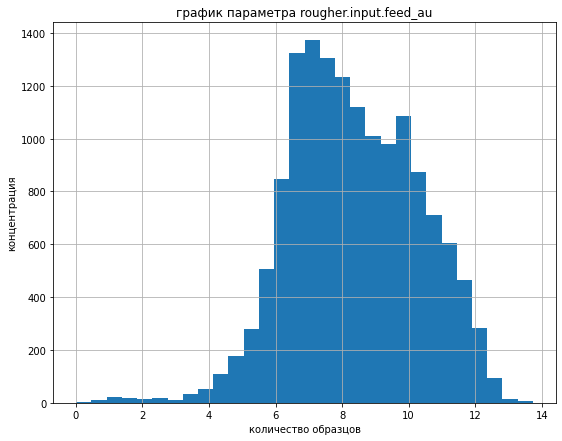

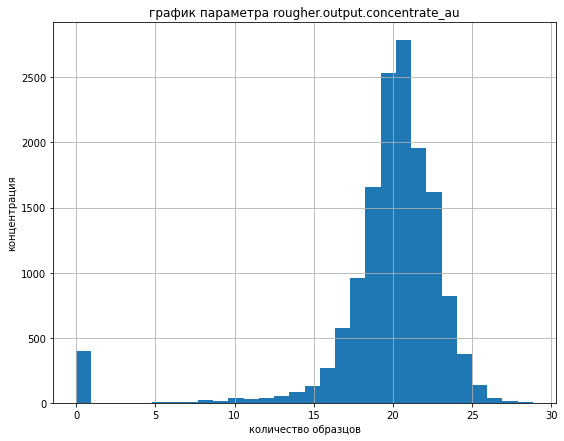

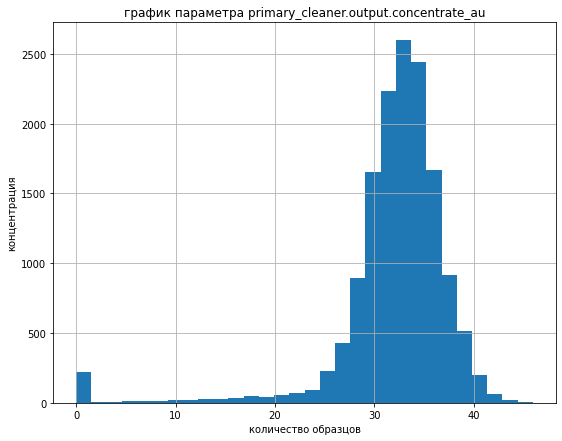

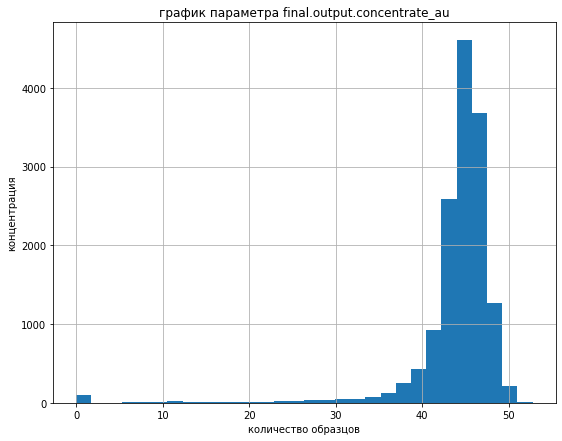

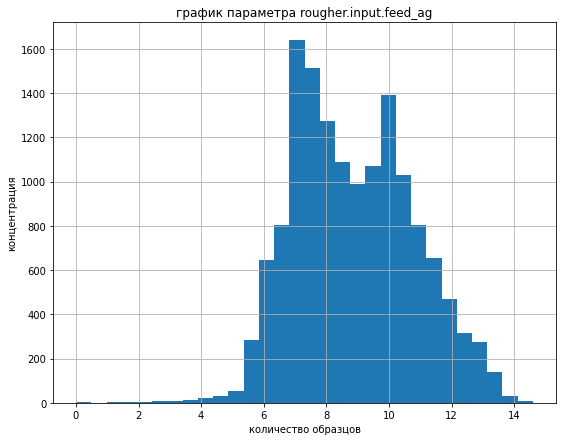

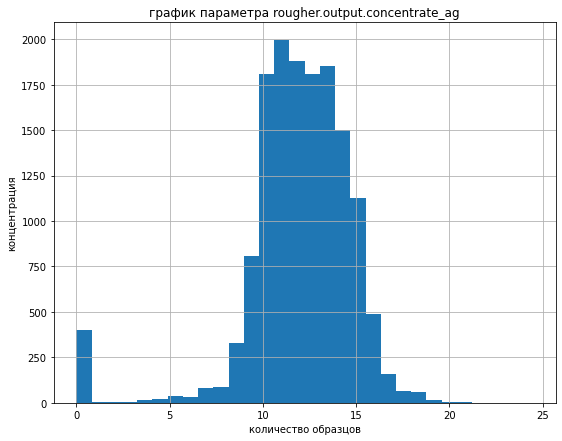

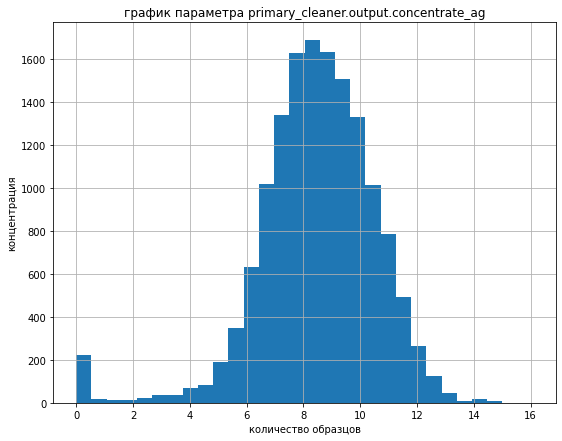

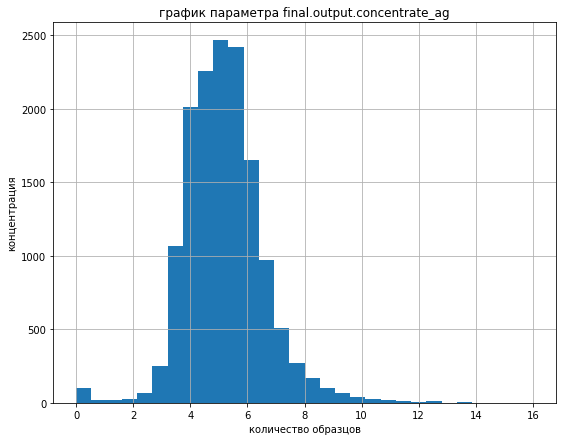

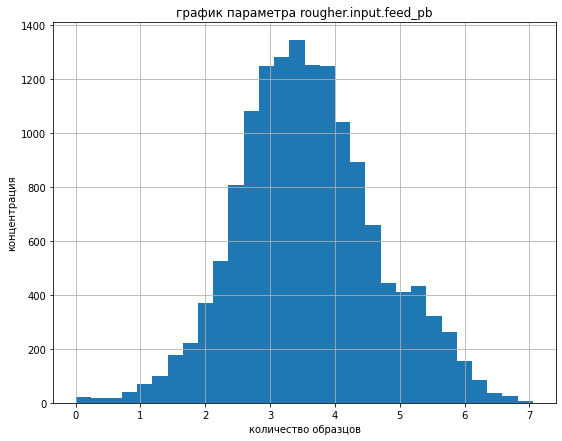

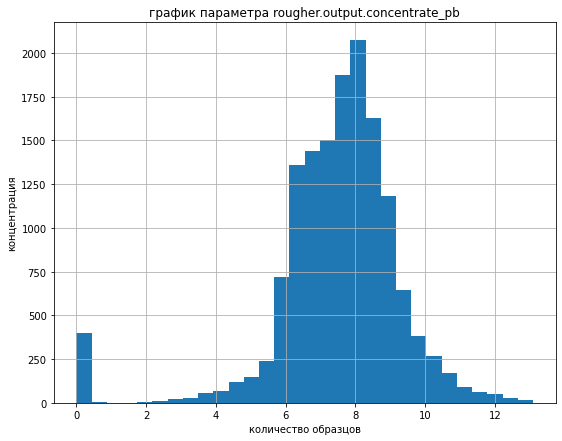

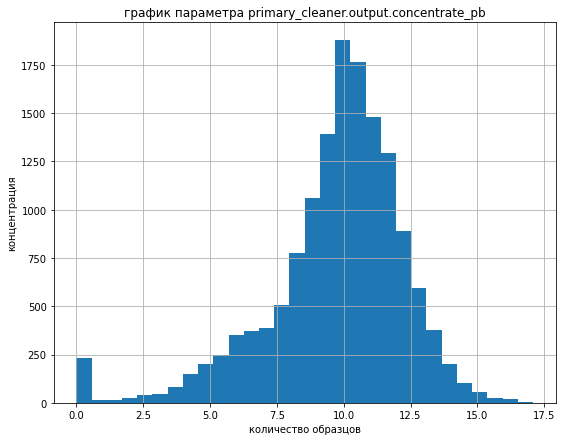

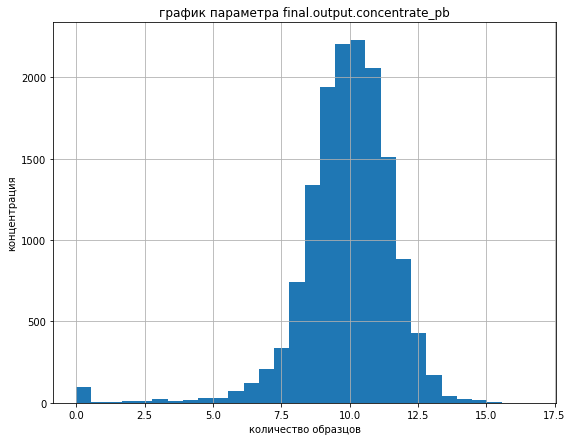

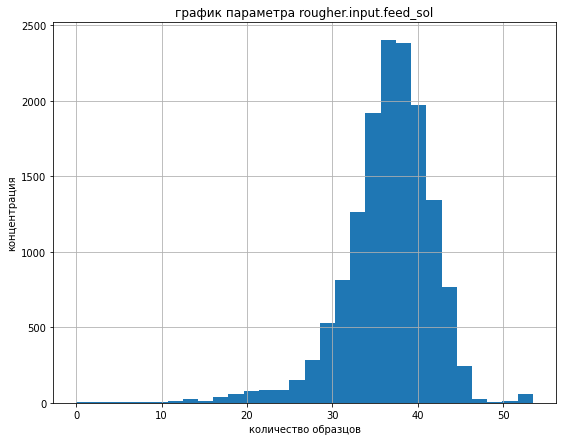

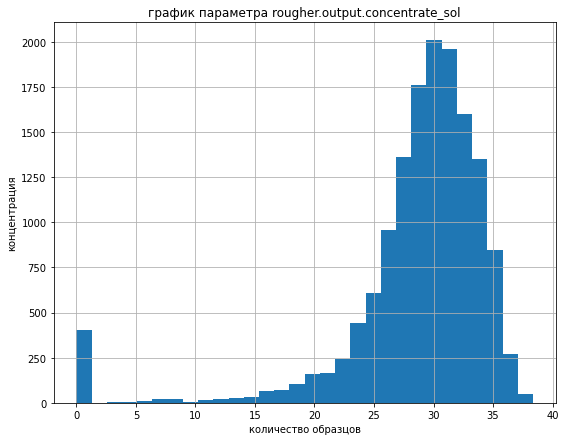

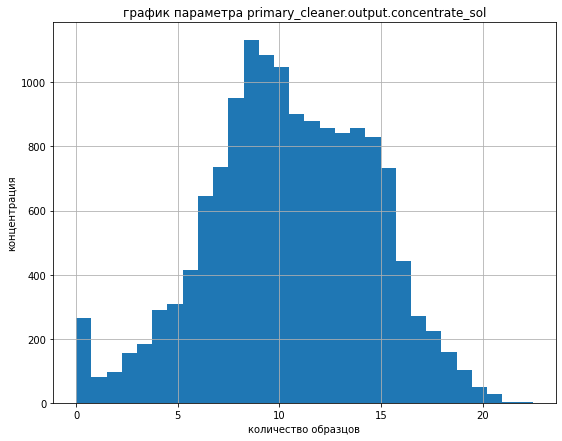

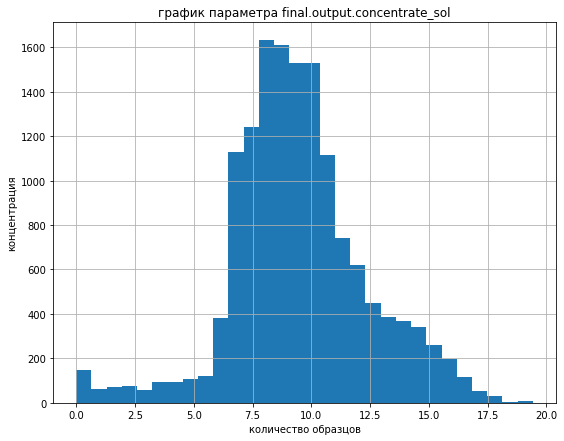

In [34]:
# строим гистрограммы для тренировочного датафрейма
bild_hist(df_train, column_list)

In [35]:
# сгруппируем список по металлам
column_list = []
column_list.append(['rougher.input.feed_au', 'rougher.output.concentrate_au',
               'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au'])

column_list.append(['rougher.input.feed_ag', 'rougher.output.concentrate_ag',
               'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag'])

column_list.append(['rougher.input.feed_pb', 'rougher.output.concentrate_pb',
               'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb',])

column_list.append(['rougher.input.feed_sol', 'rougher.output.concentrate_sol', 
               'primary_cleaner.output.concentrate_sol', 'final.output.concentrate_sol'])

Сравним концентрацию металлов по этапам очистки

In [36]:
# функция расчёт средней концентрации металла в процессе очистки
def mean_metal(data, list_column):
        i = 0
        for col in list_column:
            if i == 0:
                print(f"в среднем до очистки: {data[col].mean()}")
                i += 1
            elif i == 1:
                print(f"в среднем после чернового этапа очитски: {data[col].mean()}")
                i += 1
            elif i == 2:
                print(f"в среднем после 1го этапа на тренировочной выборке: {data[col].mean()}")
                i += 1
            else:
                print(f"в среднем после 2го этапа очитски - итоговая: {data[col].mean()}")
                
                

                    

In [37]:
def concentrate (data, list_columns, list_metal):
    for metal, col in zip(list_metal, list_columns):
        print(f'средняя концентрация металла {metal} по этам очитки очистки')
        print()
        mean_metal(data, col)
        print()

In [38]:
# расчёт средней концентрации металлов в процессе очистки
concentrate(df_train, column_list, metal_list)





средняя концентрация металла золото по этам очитки очистки

в среднем до очистки: 8.352940920963524
в среднем после чернового этапа очитски: 19.71747030146708
в среднем после 1го этапа на тренировочной выборке: 32.00753497230735
в среднем после 2го этапа очитски - итоговая: 43.97949926726813

средняя концентрация металла серебро по этам очитки очистки

в среднем до очистки: 8.877459583842949
в среднем после чернового этапа очитски: 11.944253464523852
в среднем после 1го этапа на тренировочной выборке: 8.46862550542727
в среднем после 2го этапа очитски - итоговая: 5.192031708549983

средняя концентрация металла свенец по этам очитки очистки

в среднем до очистки: 3.5920942695866973
в среднем после чернового этапа очитски: 7.498952975667613
в среднем после 1го этапа на тренировочной выборке: 9.731606020100378
в среднем после 2го этапа очитски - итоговая: 9.923714977426382

средняя концентрация металла прочее в растворе по этам очитки очистки

в среднем до очистки: 36.545645975261834
в ср

Видно что концетрация золота в породе после каждого этапа очистки значительно повышается. У серебра концентрация снижается, у свинца незначительно растёт. Общая концентрация металлов в породе неуклонно снижается.

Визуализируем размер гранул на обучающей и тестовой выборках

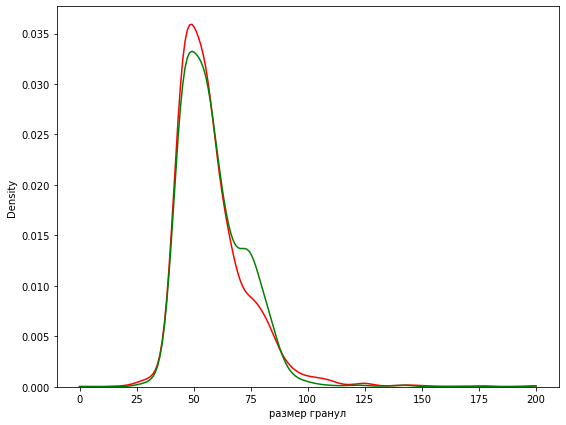

In [39]:
# построка графика распределения размера гранул в обучающей выборке
sns.kdeplot(data=df_train, x = 'rougher.input.feed_size', color='red', clip=(0,200))
sns.kdeplot(data=df_test, x = 'rougher.input.feed_size', color='green', clip=(0,200))
plt.xlabel('размер гранул')
plt.show()

Сравним размер гранул на обучающей тестовой выборках

В обучающей выборке выше количество более крупных гранул, выше 0.33. В Тестовой выборке больше гранул среднего размера, до 0.14. 


Проверим корреляцию данных

In [40]:
# корреляция для обучающего датафрейма
corr = df_train.corr()
corr.style.background_gradient(cmap='coolwarm')

In [41]:
# корреляция для тестового датафрейма
corr = df_test.corr()
corr.style.background_gradient(cmap='coolwarm')

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
rougher.input.feed_au,1.000000,0.854514,0.624706,0.028151,-0.225010,-0.217350,0.383845,0.218667,0.045345,-0.239617,0.004922,0.009227,-0.003441,0.012870,-0.036562,0.009875,-0.099221,0.041793,-0.146977,0.042231,0.402022,0.225681,0.694914,0.445471,0.146513,0.289445,0.018561,-0.128763,0.086651,-0.098647,-0.010489,-0.099802,0.143277,-0.122527,-0.278757,0.010759,-0.170840,0.024953,-0.144175,0.046069,-0.055626,-0.008101,-0.239308,0.078889,-0.111414,-0.001545,-0.292498,0.081810,-0.256894,0.113789,-0.030224,-0.062095
rougher.input.feed_ag,0.854514,1.000000,0.414965,0.051107,-0.189704,-0.167908,0.200253,0.216836,0.167938,-0.261600,-0.000184,0.014198,-0.034824,0.020213,-0.042971,0.016026,-0.063591,0.025525,-0.109847,0.027674,0.218272,0.224107,0.571852,0.496485,0.176502,0.272931,0.155277,-0.065766,0.202445,-0.038679,0.104380,-0.033029,0.143777,-0.085642,-0.199102,0.041772,-0.098679,0.049793,-0.049953,0.097317,-0.015951,0.036270,-0.132782,0.110042,-0.048382,-0.072703,-0.197911,0.111002,-0.182387,0.130520,0.040875,-0.063101
rougher.input.feed_pb,0.624706,0.414965,1.000000,0.035299,-0.167324,-0.049232,0.251286,0.086482,0.192653,0.184850,-0.255265,-0.129908,-0.246232,-0.123456,-0.321925,-0.126434,-0.327520,-0.112983,-0.305882,-0.112106,0.267793,0.077006,0.532255,0.302095,-0.033484,0.089065,-0.051640,-0.043614,-0.037758,-0.030894,-0.061842,-0.041959,0.086487,-0.046190,0.013973,-0.043514,0.040321,-0.018711,0.044347,0.010007,0.048604,-0.084135,0.088230,0.050198,0.185775,-0.023740,0.020991,0.003950,0.036384,0.027364,-0.121498,-0.050525
rougher.input.feed_sol,0.028151,0.051107,0.035299,1.000000,0.620246,0.296177,0.257622,0.339848,0.184161,0.324432,-0.201940,-0.121009,-0.216885,-0.123726,-0.265964,-0.125970,-0.190690,-0.143835,-0.168769,-0.132312,0.266881,0.268369,0.343462,0.020929,0.002426,0.228286,0.016418,-0.087726,-0.032808,-0.124843,-0.025828,-0.122321,0.101906,-0.111053,0.111961,-0.043186,0.064613,-0.029163,0.078151,-0.058345,-0.075330,-0.043331,0.231946,-0.072408,0.154308,0.118958,0.098338,-0.085766,0.108004,-0.078661,-0.162508,0.006243
rougher.input.feed_rate,-0.225010,-0.189704,-0.167324,0.620246,1.000

In [42]:
# корреляция для полного датафрейма
corr = df_full.corr()
corr.style.background_gradient(cmap='coolwarm')

Самая заметная корреляция наблюдатся между флотационными установками. На тоговое содержание сильно золота в породе сильно влияет содержание золота в базовой породе и в хвостах.

Найдём аномалии в полной выборке. Для этого посчитаемт сумму очищенного металла по всем этапам.

In [43]:
# суммирование столбцов
input_input_sum = ['rougher.input.feed_au', 'rougher.input.feed_ag',
               'rougher.input.feed_pb', 'rougher.input.feed_sol']
df_full['rougher.input.feed_sum'] = df_full[input_input_sum].sum(axis=1)

input_output_sum = ['rougher.output.concentrate_au', 'rougher.output.concentrate_ag',
                   'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol']
df_full['rougher.output.concentrate_sum'] = df_full[input_output_sum].sum(axis=1)

primary_cleaner_output_sum = ['primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_ag',
                             'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol']
df_full['primary_cleaner.output.concentrate_sum'] = df_full[primary_cleaner_output_sum].sum(axis=1)

final_output_concentrate_sum = ['final.output.concentrate_au', 'final.output.concentrate_ag',
                               'final.output.concentrate_pb', 'final.output.concentrate_sol']
df_full['final.output.concentrate_sum'] = df_full[primary_cleaner_output_sum].sum(axis=1)


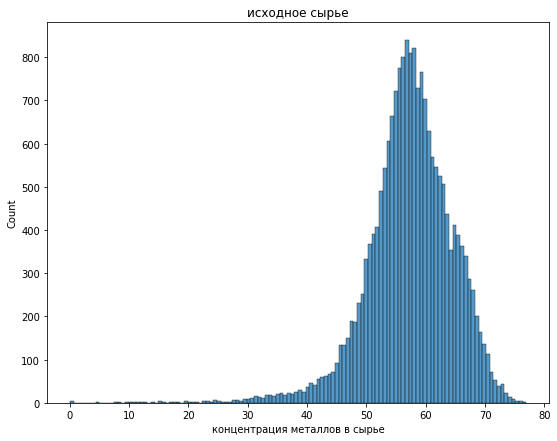

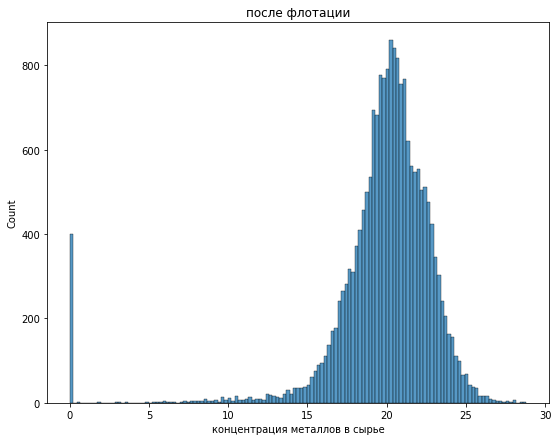

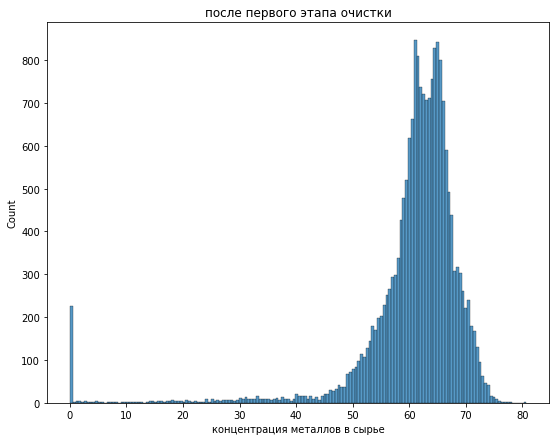

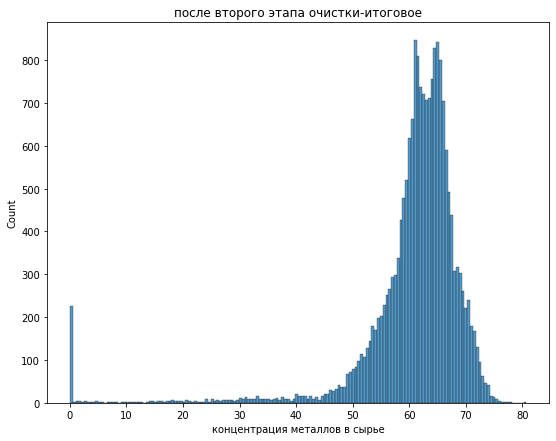

In [44]:
# построение гистограмм распределения
sns.histplot(df_full, x = 'rougher.input.feed_sum')
plt.xlabel('концентрация металлов в сырье')
plt.title('исходное сырье')
plt.show()

sns.histplot(df_full, x = 'rougher.output.concentrate_au')
plt.xlabel('концентрация металлов в сырье')
plt.title('после флотации')
plt.show()

sns.histplot(df_full, x = 'primary_cleaner.output.concentrate_sum')
plt.xlabel('концентрация металлов в сырье')
plt.title('после первого этапа очистки')
plt.show()


sns.histplot(df_full, x = 'final.output.concentrate_sum')
plt.xlabel('концентрация металлов в сырье')
plt.title('после второго этапа очистки-итоговое')
plt.show()

Заметны аномалии. Много нулевых значений. Проверим, чему равны аномалии

In [45]:
df_full['rougher.input.feed_sum'].sort_values().head(10)

12628    0.040000
12627    0.040000
12626    0.040000
15838    0.040000
15837    0.040000
3668     4.501868
10645    8.072476
12690    8.217984
984      8.219283
1482     8.429133
Name: rougher.input.feed_sum, dtype: float64

In [46]:
df_full['rougher.input.feed_sum'].sort_values().head(10)

12628    0.040000
12627    0.040000
12626    0.040000
15838    0.040000
15837    0.040000
3668     4.501868
10645    8.072476
12690    8.217984
984      8.219283
1482     8.429133
Name: rougher.input.feed_sum, dtype: float64

In [47]:
df_full['rougher.output.concentrate_au'].sort_values().head(10)

12034    0.0
3773     0.0
3772     0.0
5920     0.0
3771     0.0
3770     0.0
3769     0.0
3768     0.0
3767     0.0
3766     0.0
Name: rougher.output.concentrate_au, dtype: float64

In [48]:
df_full['primary_cleaner.output.concentrate_sum'].sort_values().head(10)

9246     0.0
11079    0.0
7324     0.0
11898    0.0
5466     0.0
593      0.0
592      0.0
11109    0.0
10872    0.0
11110    0.0
Name: primary_cleaner.output.concentrate_sum, dtype: float64

Аномальные значения равны 0 и околонулевым значеням. Удалим все значения меньше едницы

In [49]:
list = ['rougher.input.feed_sum', 'rougher.output.concentrate_sum', 'primary_cleaner.output.concentrate_sum', 'final.output.concentrate_sum']
for col in list:
    df_full = df_full[df_full[col]>1]

Проверим наличие аномалий на графиках

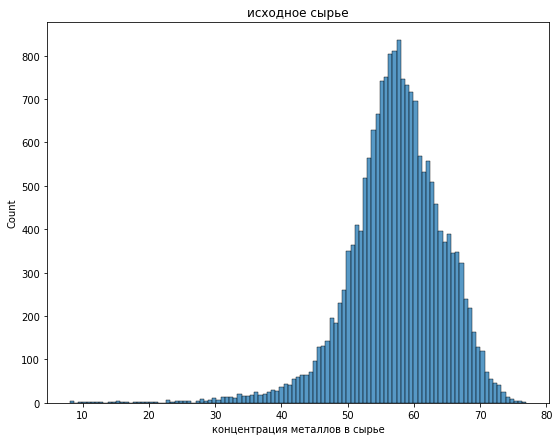

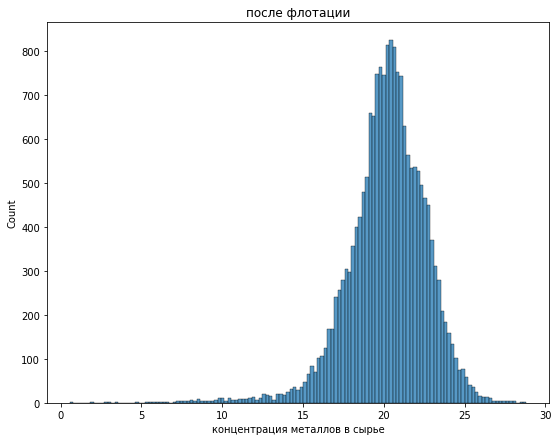

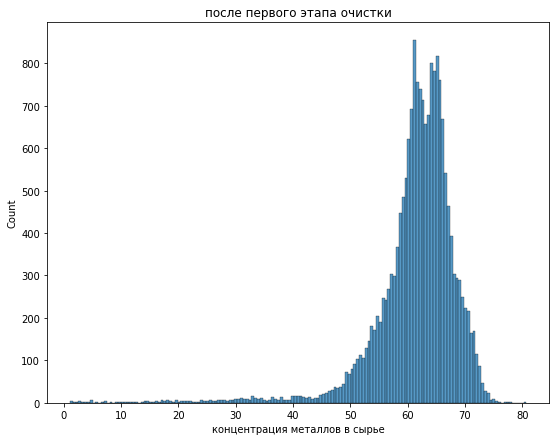

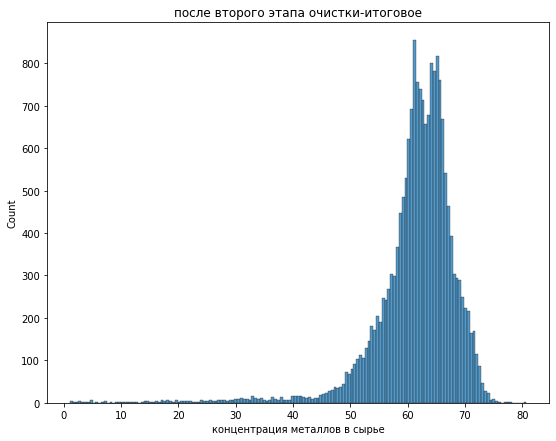

In [50]:
# построение гистограмм распределения
sns.histplot(df_full, x = 'rougher.input.feed_sum')
plt.xlabel('концентрация металлов в сырье')
plt.title('исходное сырье')
plt.show()

sns.histplot(df_full, x = 'rougher.output.concentrate_au')
plt.xlabel('концентрация металлов в сырье')
plt.title('после флотации')
plt.show()

sns.histplot(df_full, x = 'primary_cleaner.output.concentrate_sum')
plt.xlabel('концентрация металлов в сырье')
plt.title('после первого этапа очистки')
plt.show()


sns.histplot(df_full, x = 'final.output.concentrate_sum')
plt.xlabel('концентрация металлов в сырье')
plt.title('после второго этапа очистки-итоговое')
plt.show()

Очистим train выборку от аномалий

In [51]:
df_train = df_train.set_index('date')
df_full = df_full.set_index('date')
df_train = df_train.loc[df_train.index.isin(df_full.index)]

Как и предполагалось. Видно что концентрация к финальной очистке увеличивается.
Удалили данные которые не нужны для предсказаний моделей. Построили графики. И выяснили что распределние металла в руде в процессе очистки близко к нормальному. Проверили корреляцию даннных. Заметно что некоторые процессы больше влияют на очистку.
Были выявлены и удалены аномальные значения.

## Модель

Обучаем модели будем на датафрейме df_train. 
Будем использовать метрику качества sMAPE. 
Обучим модель линейной регрессии

Подготовим данные для обучения модели

In [52]:
# функция для расчёта sMAPE
def smape (y, y1):
    # y - актуальное значение
    # y1 - предсказанное значение
    return round(np.mean(np.abs(y - y1) / ((np.abs(y) + np.abs(y1))/2))*100 , 2)
    

In [53]:
# функция для расчёта финального sMAPE
def final_smape(rougher, final):
    return 0.25 * rougher + 0.75 * final

Подготовим данные для тестирования модели

Нужно будет резделить выборку для исследования чернового концентрата и полную выборку

In [54]:
df_test = df_test.merge(df_full[['rougher.output.recovery', 'final.output.recovery']],
                         how = 'inner', on= 'date')
df_test = df_test.set_index('date')

In [55]:
# выбраем только "черновые" признаки
rougher_cols = [col for col in df_test.columns if col.startswith('rougher')]
rougher_cols


['rougher.input.feed_au',
 'rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_sol',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank10_xanthate',
 'rougher.state.floatbank10_a_air',
 'rougher.state.floatbank10_a_level',
 'rougher.state.floatbank10_b_air',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_c_air',
 'rougher.state.floatbank10_c_level',
 'rougher.state.floatbank10_d_air',
 'rougher.state.floatbank10_d_level',
 'rougher.state.floatbank10_e_air',
 'rougher.state.floatbank10_e_level',
 'rougher.state.floatbank10_f_air',
 'rougher.state.floatbank10_f_level',
 'rougher.input.floatbank11_sulfate',
 'rougher.input.floatbank11_xanthate',
 'rougher.output.recovery']

In [56]:
# присваиваем черновые колонки
rougher_df_train = df_train[rougher_cols]
rougher_df_test = df_test[rougher_cols]
rougher_df_full = df_full[rougher_cols]

In [57]:
rougher_X_train = rougher_df_train.drop(['rougher.output.recovery'], axis=1).reset_index(drop=True)
rougher_y_train = rougher_df_train['rougher.output.recovery'].reset_index(drop=True)

rougher_X_test = rougher_df_test.drop(['rougher.output.recovery'], axis=1).reset_index(drop=True)
rougher_y_test = rougher_df_test['rougher.output.recovery'].reset_index(drop=True)

rougher_X_full = rougher_df_full.drop(['rougher.output.recovery'], axis=1).reset_index(drop=True)
rougher_y_full = rougher_df_full['rougher.output.recovery'].reset_index(drop=True)

print(rougher_X_train.shape)
print(rougher_y_train.shape)
print(rougher_X_test.shape)
print(rougher_y_test.shape)
print(rougher_X_full.shape)
print(rougher_y_full.shape)

(13978, 22)
(13978,)
(4839, 22)
(4839,)
(18817, 22)
(18817,)


Удаляем лишние признаки для модели, оставляем только те, что есть в тестовой выборке

In [58]:
# удалёем лишние признаки для модели
final_df_train = df_train[df_test.columns]
final_df_full = df_full[df_test.columns]


In [59]:
final_X_train = final_df_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1).reset_index(drop=True)
final_y_train = final_df_train['final.output.recovery'].reset_index(drop=True)

final_X_test = df_test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1).reset_index(drop=True)
final_y_test = df_test['final.output.recovery'].reset_index(drop=True)

final_X_full = final_df_full.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1).reset_index(drop=True)
final_y_full = final_df_full['final.output.recovery'].reset_index(drop=True)

print(final_X_train.shape)
print(final_y_train.shape)
print(final_X_test.shape)
print(final_y_test.shape)
print(final_X_full.shape)
print(final_y_full.shape)

(13978, 52)
(13978,)
(4839, 52)
(4839,)
(18817, 52)
(18817,)


Выбор модели

**Линейная регрессия**

In [60]:
cv = 5
scorer = make_scorer(smape)

In [61]:
# обучаем модель линейной регрессии
def cross_validation_linear(X, y):
    model = LinearRegression()
    score = cross_val_score(model, X, y, cv=cv, scoring=scorer).mean()

    print('Средний sMAPE:', score)


In [62]:
cross_validation_linear(rougher_X_train, rougher_y_train)

Средний sMAPE: 6.659999999999999


In [63]:
cross_validation_linear(final_X_train, final_y_train)

Средний sMAPE: 11.012


**Далее проверим решающее дерево**

In [64]:
cv = 5
scorer = make_scorer(smape)

In [65]:
#обучаем модель решающее дерево
def cross_validation_decision_tree(X, y):
    best_score = 100
    best_depth = 0
    for depth in range(1, 20):
        model = DecisionTreeRegressor(random_state=RANDOM_STATE, max_depth=depth)
        score = cross_val_score(model, X, y, cv=cv, scoring=scorer).mean()

        if score < best_score:
            best_score = score
            best_depth = depth
        print('Среднее sMAPE дерева решений глубины:', depth, '—', score)
    print('Лучший результат:\n')
    print('Средний sMAPE:', best_score)
    print('Глубина дерева:', best_depth)

In [66]:
cross_validation_decision_tree(rougher_X_train, rougher_y_train)

Среднее sMAPE дерева решений глубины: 1 — 7.134
Среднее sMAPE дерева решений глубины: 2 — 6.406000000000001
Среднее sMAPE дерева решений глубины: 3 — 6.978
Среднее sMAPE дерева решений глубины: 4 — 7.223999999999999
Среднее sMAPE дерева решений глубины: 5 — 8.290000000000001
Среднее sMAPE дерева решений глубины: 6 — 8.0
Среднее sMAPE дерева решений глубины: 7 — 7.272
Среднее sMAPE дерева решений глубины: 8 — 8.786
Среднее sMAPE дерева решений глубины: 9 — 9.092
Среднее sMAPE дерева решений глубины: 10 — 9.518
Среднее sMAPE дерева решений глубины: 11 — 9.580000000000002
Среднее sMAPE дерева решений глубины: 12 — 8.504000000000001
Среднее sMAPE дерева решений глубины: 13 — 10.158
Среднее sMAPE дерева решений глубины: 14 — 8.758
Среднее sMAPE дерева решений глубины: 15 — 9.574
Среднее sMAPE дерева решений глубины: 16 — 10.164
Среднее sMAPE дерева решений глубины: 17 — 10.066
Среднее sMAPE дерева решений глубины: 18 — 10.347999999999999
Среднее sMAPE дерева решений глубины: 19 — 10.17
Лучш

In [67]:
cross_validation_decision_tree(final_X_train, final_y_train)

Среднее sMAPE дерева решений глубины: 1 — 10.99
Среднее sMAPE дерева решений глубины: 2 — 10.236
Среднее sMAPE дерева решений глубины: 3 — 10.822000000000001
Среднее sMAPE дерева решений глубины: 4 — 11.53
Среднее sMAPE дерева решений глубины: 5 — 11.214
Среднее sMAPE дерева решений глубины: 6 — 11.838
Среднее sMAPE дерева решений глубины: 7 — 12.779999999999998
Среднее sMAPE дерева решений глубины: 8 — 13.772
Среднее sMAPE дерева решений глубины: 9 — 13.532
Среднее sMAPE дерева решений глубины: 10 — 15.245999999999999
Среднее sMAPE дерева решений глубины: 11 — 14.639999999999997
Среднее sMAPE дерева решений глубины: 12 — 14.501999999999999
Среднее sMAPE дерева решений глубины: 13 — 16.718
Среднее sMAPE дерева решений глубины: 14 — 16.69
Среднее sMAPE дерева решений глубины: 15 — 17.881999999999998
Среднее sMAPE дерева решений глубины: 16 — 19.258
Среднее sMAPE дерева решений глубины: 17 — 19.298
Среднее sMAPE дерева решений глубины: 18 — 19.208
Среднее sMAPE дерева решений глубины: 19

**Проверим модель случайный лес**

In [68]:
# обучаем модель случайный леc
def cross_validation_random_forest(X, y):
    total_score = 100
    total_depth = 0
    total_estimators = 0
    for depth in range(1, 21, 2):
        best_score = 100
        best_depth = 0
        best_estimators = 0
        for estimator in range(10, 31, 5):
            model = RandomForestRegressor(random_state=RANDOM_STATE, 
                                          n_estimators=estimator, 
                                          max_depth=depth)
            score = cross_val_score(model, X, y, cv=cv, scoring=scorer).mean()

            if score < best_score:
                best_score = score
                best_depth = depth
                best_estimators = estimator

        print('Лучшее среднее sMAPE случайного леса для глубины:', depth,
              'при', best_estimators, 'деревьев: ', best_score)
        if best_score < total_score:
            total_score = best_score
            total_depth = best_depth
            total_estimators = best_estimators
    print('Лучший результат:\n')
    print('Средний sMAPE:', total_score)
    print('Глубина дерева:', total_depth)
    print('Количество деревьев:', total_estimators)

In [69]:
cross_validation_random_forest(rougher_X_train, rougher_y_train)

Лучшее среднее sMAPE случайного леса для глубины: 1 при 10 деревьев:  7.01
Лучшее среднее sMAPE случайного леса для глубины: 3 при 30 деревьев:  6.392
Лучшее среднее sMAPE случайного леса для глубины: 5 при 30 деревьев:  6.35
Лучшее среднее sMAPE случайного леса для глубины: 7 при 25 деревьев:  6.459999999999999
Лучшее среднее sMAPE случайного леса для глубины: 9 при 30 деревьев:  6.712000000000001
Лучшее среднее sMAPE случайного леса для глубины: 11 при 30 деревьев:  6.792
Лучшее среднее sMAPE случайного леса для глубины: 13 при 30 деревьев:  6.93
Лучшее среднее sMAPE случайного леса для глубины: 15 при 30 деревьев:  6.906000000000001
Лучшее среднее sMAPE случайного леса для глубины: 17 при 30 деревьев:  6.962000000000001
Лучшее среднее sMAPE случайного леса для глубины: 19 при 30 деревьев:  6.876
Лучший результат:

Средний sMAPE: 6.35
Глубина дерева: 5
Количество деревьев: 30


In [70]:
cross_validation_random_forest(final_X_train, final_y_train)

Лучшее среднее sMAPE случайного леса для глубины: 1 при 15 деревьев:  10.648
Лучшее среднее sMAPE случайного леса для глубины: 3 при 20 деревьев:  10.282
Лучшее среднее sMAPE случайного леса для глубины: 5 при 30 деревьев:  10.798
Лучшее среднее sMAPE случайного леса для глубины: 7 при 30 деревьев:  11.318000000000001
Лучшее среднее sMAPE случайного леса для глубины: 9 при 30 деревьев:  11.693999999999999
Лучшее среднее sMAPE случайного леса для глубины: 11 при 30 деревьев:  12.09
Лучшее среднее sMAPE случайного леса для глубины: 13 при 30 деревьев:  12.258
Лучшее среднее sMAPE случайного леса для глубины: 15 при 30 деревьев:  12.412
Лучшее среднее sMAPE случайного леса для глубины: 17 при 30 деревьев:  12.494
Лучшее среднее sMAPE случайного леса для глубины: 19 при 30 деревьев:  12.491999999999999
Лучший результат:

Средний sMAPE: 10.282
Глубина дерева: 3
Количество деревьев: 20


Лучшая модель

Наилучшие результаты показала модель  случайного леса.

С параметрами для черновой сборки:

глубина дерева 5, количество дереьвев 30.
Средний sMAPE: 6.35

Для полной сборки
Модель решающее дерево (глубина 2) и случайный лес (глубина дерева 3, количество деревьев 20)
показали схожий результат sMAPE 10.236 b 10.282 соответственно. Для удобства возьмум модель случайный лес



Попробуем применить эти модели при расчёте итогового sMAPE в следующих комбинациях:

используем для каждого этапа свою модель

используем для каждого этапа модель флотационных расчётов (попробуем предсказать финальный результат исходя из начальных данных)

используем для каждого этапа модель финальных расчётов

Так мы убедимся, действительно ли лучше использовать две разные модели для двух этапов

Для удобства, напишем функцию


In [71]:
def calculate_final_smape(depth, estimators, rougher_X, final_X):
    model = RandomForestRegressor(random_state=RANDOM_STATE, max_depth=depth, n_estimators=estimators)
    score_rougher = cross_val_score(model, rougher_X, rougher_y_train, cv=cv, scoring=scorer).mean()
    score_final = cross_val_score(model, final_X, final_y_train, cv=cv, scoring=scorer).mean()
    total_smape = final_smape(score_rougher, score_final)
    print('Средний sMAPE флотации:', score_rougher)
    print('Средний sMAPE финального этапа:', score_final)
    print('Итоговый sMAPE:', total_smape)

Расчитаем итоговый sMAPE при помощи данных, доступных перед флотацией при:

In [72]:
calculate_final_smape(5, 30, rougher_X_train, rougher_X_train)

Средний sMAPE флотации: 6.35
Средний sMAPE финального этапа: 10.808
Итоговый sMAPE: 9.6935


In [77]:
calculate_final_smape(3, 20, rougher_X_train, rougher_X_train)

Средний sMAPE флотации: 6.43
Средний sMAPE финального этапа: 10.98
Итоговый sMAPE: 9.8425


Теперь расчитаем итоговый sMAPE при помощи всех данных при:

In [74]:
calculate_final_smape(5, 30, final_X_train, final_X_train)

Средний sMAPE флотации: 6.595999999999999
Средний sMAPE финального этапа: 10.798
Итоговый sMAPE: 9.747499999999999


In [78]:
calculate_final_smape(3, 20, final_X_train, final_X_train)

Средний sMAPE флотации: 7.134
Средний sMAPE финального этапа: 10.282
Итоговый sMAPE: 9.495000000000001


Теперь посчитаем итоговый sMAPE, но с учётом свеого набора обучающих данных для каждого этапа при:

In [79]:
calculate_final_smape(5, 30, rougher_X_train, final_X_train)

Средний sMAPE флотации: 6.35
Средний sMAPE финального этапа: 10.798
Итоговый sMAPE: 9.686


In [80]:
calculate_final_smape(3, 20, rougher_X_train, final_X_train)

Средний sMAPE флотации: 6.43
Средний sMAPE финального этапа: 10.282
Итоговый sMAPE: 9.318999999999999


Наконец, посчитаем итоговый sMAPE, с учётом своего набора обучающих данных для каждого этапа и своих гиперпараметрах под каждый этап

In [81]:
rougher_model = RandomForestRegressor(random_state=RANDOM_STATE, max_depth=5, n_estimators=30)
final_model = RandomForestRegressor(random_state=RANDOM_STATE, max_depth=3, n_estimators=20)
score_rougher = cross_val_score(rougher_model, rougher_X_train, rougher_y_train, cv=cv, scoring=scorer).mean()
score_final = cross_val_score(final_model, final_X_train, final_y_train, cv=cv, scoring=scorer).mean()
total_smape = final_smape(score_rougher, score_final)
print('Средний sMAPE флотации:', score_rougher)
print('Средний sMAPE финального этапа:', score_final)
print('Итоговый sMAPE:', total_smape)

Средний sMAPE флотации: 6.35
Средний sMAPE финального этапа: 10.282
Итоговый sMAPE: 9.299


Итак, наилучший результат мы получили при использовании своей модели для каждого этапа и своих гиперпараметров также для каждого этапа отдельно:





**Проверка модели на тестовой выборке**

Теперь проверим наилучший результат на тестовой выборке

In [82]:
rougher_model = RandomForestRegressor(random_state=RANDOM_STATE, max_depth=5, n_estimators=30)
final_model = RandomForestRegressor(random_state=RANDOM_STATE, max_depth=3, n_estimators=20)

rougher_model.fit(rougher_X_train, rougher_y_train)
predictions_rouger = rougher_model.predict(rougher_X_test)

final_model.fit(final_X_train, final_y_train)
predictions_final = final_model.predict(final_X_test)

score_rougher = smape(rougher_y_test, predictions_rouger)
score_final = smape(final_y_test, predictions_final)
total_smape = final_smape(score_rougher, score_final)
print('sMAPE флотации:', score_rougher)
print('sMAPE финального этапа:', score_final)
print('Итоговый sMAPE:', total_smape)

sMAPE флотации: 4.1
sMAPE финального этапа: 8.34
Итоговый sMAPE: 7.279999999999999


Проверка модели на адекватность

In [84]:
strategies = ['mean', 'median']
for strat in strategies:
    dummy = DummyRegressor(strategy=strat)

    dummy.fit(rougher_X_train, rougher_y_train)
    predictions_rouger = dummy.predict(rougher_X_test)

    dummy.fit(final_X_train, final_y_train)
    predictions_final = dummy.predict(final_X_test)

    score_rougher = smape(rougher_y_test, predictions_rouger)
    score_final = smape(final_y_test, predictions_final)
    total_smape = final_smape(score_rougher, score_final)
    print('----- Стратегия:', strat, '-----')
    print('sMAPE флотации:', score_rougher)
    print('sMAPE финального этапа:', score_final)
    print('Итоговый sMAPE:', total_smape)
    print()

----- Стратегия: mean -----
sMAPE флотации: 6.11
sMAPE финального этапа: 9.36
Итоговый sMAPE: 8.5475

----- Стратегия: median -----
sMAPE флотации: 5.83
sMAPE финального этапа: 9.1
Итоговый sMAPE: 8.282499999999999



Обученная модель работает лучше, чем модель Dummy классификатора. Можем сказать, что модель прошла проверку на адекватность

**Вывод**

На данном этапе мы сделали следующее:

написали функцию расчёта метрики качества sMAPE и итоговой метрики

выделили столбцы с данными, которые относятся к этапу флотации

выделили целевые признаки

выбрали оптимальную модель

протестировали оптимальную модель и проверили её на адекватность

Наилучшим подходом оказалось использование двух моделей и двух наборов обучающих данных:

для этапа флотации использовались данные, которые содержат только входную информацию, доступную для флотации, а модель 

случайного леса была настроена с максимально глубиной 5 и количеством оценщиков 30
для финального этапа использовались все доступные для обучения данные, а модель настроена с максимальной глубиной 3 и количеством оценщиков 20

**Итоговый вывод**

Нам были предоставлены данные о неких параметрах технологического процесса переработки металлической руды и добычи из неё золота
Необходимо было подготовить прототип модели машинного обучения, которая предсказывает коэффициент восстановления золота из золотосодержащей руды

Сначала подготовили данные

Строки с проспусками были заменены
Проверили как меняется концетрация металлов в процессе очистки

Видно что концетрация золота в породе после каждого этапа очистки значительно повышается. У серебра концентрация снижается, у свинца незначительно растёт. Кончентрация остальных примесей неуклонно снижается

Мы проанализировали размера гранул на обучающей и тестовой выборках и убедились, что их распределения схожи. Также провели анализ суммарной концентрации всех металлов во время разных стадий. Мы обнаружили странные значения около 0, большая часть из которых укладыввалась в диапазон 0-1. Такие данные мы посчитали как "ошибочные" и удалили их из всех датасетов

На данном этапе мы сделали следующее:

написали функцию расчёта метрики качества sMAPE и итоговой метрики

выделили столбцы с данными, которые относятся к этапу флотации

выделили целевые признаки

провели масштабирование данных

выбрали оптимальную модель

протестировали оптимальную модель и проверили её на адекватность

Наилучшим подходом оказалось использование двух моделей и двух наборов обучающих данных:

для этапа флотации использовались данные, которые содержат только входную информацию, доступную для флотации, а модель 
случайного леса была настроена с максимально глубиной 5 и количеством оценщиков 30
для финального этапа использовались все доступные для обучения данные, а модель настроена с максимальной глубиной 3 и количеством оценщиков 20

Удалость достичь значения метрики sMAPE:

4.1 для тестовой флотационной выборки

8.34 для тестовой финальной выборки

7.23- итоговое значение sMAPE